In [21]:
from pyspark.sql.functions import randn, rand, sum, col, round
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [22]:
df18v1 = spark.read.csv('data/pluto_18v1.csv', header=True)
df18v2 = spark.read.csv('data/pluto.csv', header=True)
df17v11 = spark.read.csv('data/pluto_17v11.csv', header=True)

### convert column names all to lower case

In [23]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v2 = df18v2.select([col(A).alias(A.lower()) for A in df18v2.schema.names])
df17v11 = df17v11.select([col(A).alias(A.lower()) for A in df17v11.schema.names])

In [24]:
cols = df18v1.columns

In [25]:
df18v1 = df18v1.select(cols)
df18v2 = df18v2.select(cols)
df17v11 = df17v11.select(cols)

In [26]:
df =df18v1.union(df18v2).union(df17v11)

In [43]:
start_time = time.time()
summary = df.groupBy("version", 'borough').agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag"),
                                   sum(col("lotarea")*col("builtfar")),
                                   sum(col("lotarea")*col("residfar")),
                                   sum(col("lotarea")*col("commfar")),
                                   sum(col("lotarea")*col("facilfar"))).toPandas()
elapsed_time = time.time() - start_time

In [44]:
elapsed_time

19.86338710784912

In [45]:
agg_cols = ['version','borough','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG','LotAreaXBuiltFAR', 'LotAreaXResidFAR',
'LotAreaXCommFAR', 'LotAreaXFacilFAR']

In [46]:
summary.columns = agg_cols

In [48]:
summary

,version,borough,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
0,17v1.1,BK,1027752.0,1.674218e+09,1.449117e+09,407419975.0,984170157.0,82949605.0,69872319.0,23646425.0,...,1.558763e+10,5.781815e+10,9.064262e+09,2.870522e+10,7471.0,25231.0,1.442244e+09,1.734544e+09,4.569858e+08,2.996948e+09
1,18v2,MN,948378.0,4.546559e+08,1.769096e+09,702728834.0,727473734.0,401817023.0,77195143.0,31155043.0,...,5.130397e+10,2.317544e+11,1.734916e+10,6.245420e+10,1949.0,2757.0,1.768815e+09,1.491604e+09,7.557634e+08,1.989281e+09
2,18v2,SI,176377.0,1.176521e+09,2.803157e+08,62998696.0,205830804.0,12260410.0,14691916.0,2959354.0,...,4.843319e+09,1.092354e+10,2.826501e+09,5.430856e+09,9482.0,13521.0,2.803366e+08,5.286448e+08,3.339505e+08,1.026460e+09
3,18V1,BX,546425.0,9.200189e+08,7.290402e+08,196379599.0,514043553.0,45440460.0,31441434.0,23090510.0,...,4.894598e+09,2.745183e+10,2.493828e+09,1.549094e+10,3511.0,3332.0,7.269904e+08,1.076496e+09,2.784722e+08,2.011241e+09
4,17v1.1,MN,941340.0,5.040022e+08,1.795404e+09,813494423.0,898649248.0,463677365.0,102206114.0,39477068.0,...,5.122373e+10,2.230931e+11,1.700054e+10,6.188304e+10,1942.0,2750.0,1.788240e+09,1.802323e+09,9.858878e+08,2.399838e+09
5,17v1.1,BX,541982.0,9.209656e+08,7.241491e+08,195270343.0,510938376.0,45428727.0,31187653.0,23441280.0,...,4.857708e+09,2.647741e+10,2.516768e+09,1.549047e+10,3512.0,3333.0,7.234717e+08,1.058363e+09,2.806772e+08,2.009645e+09
6,17v1.1,SI,175228.0,1.322844e+09,2.827557e+08,59424155.0,216160939.0,12491991.0,15231102.0,2800848.0,...,4.865263e+09,1.467328e+10,2.851172e+09,9.289201e+09,9331.0,13403.0,2.824035e+08,5.204470e+08,4.072142e+08,1.112306e+09
7,18V1,SI,175819.0,1.330883e+09,2.857679e+08,60533055.0,217269523.0,12565995.0,14439908.0,3240086.0,...,4.836230e+09,1.097940e+10,2.808225e+09,5.378989e+09,9331.0,13403.0,2.845620e+08,5.517781e+08,4.312983e+08,1.145715e+09
8,18v2,BK,1037553.0,1.646501e+09,1.430311e+09,391294214.0,924416817.0,78835305.0,65680873.0,20541712.0,...,1.525449e+10,5.926071e+10,8.655817e+09,2.841129e+10,7426.0,25173.0,1.429846e+09,1.612377e+09,4.890595e+08,2.959593e+09
9,18v2,BX,550931.0,8.997340e+08,7.459635e+08,191124387.0,495399206.0,44020842.0,29238134.0,21878913.0,...,4.901913e+09,2.738170e+10,2.533072e+09,1.572202e+10,3523.0,3339.0,7.454658e+08,1.045458e+09,2.557201e+08,1.972065e+09


In [62]:
summaryMN = summary[(summary.borough == 'MN') & (summary.version != '17v1.1')]
summarySI = summary[(summary.borough == 'SI') & (summary.version != '17v1.1')]
summaryBK = summary[(summary.borough == 'BK') & (summary.version != '17v1.1')]
summaryBX = summary[(summary.borough == 'BX') & (summary.version != '17v1.1')]
summaryQN = summary[(summary.borough == 'QN') & (summary.version != '17v1.1')]
# summary.index = summary.version

In [63]:
summaryBX

,version,borough,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
3,18V1,BX,546425.0,9.200189e+08,729040240.0,196379599.0,514043553.0,45440460.0,31441434.0,23090510.0,...,4.894598e+09,2.745183e+10,2.493828e+09,1.549094e+10,3511.0,3332.0,7.269904e+08,1.076496e+09,2.784722e+08,2.011241e+09
9,18v2,BX,550931.0,8.997340e+08,745963505.0,191124387.0,495399206.0,44020842.0,29238134.0,21878913.0,...,4.901913e+09,2.738170e+10,2.533072e+09,1.572202e+10,3523.0,3339.0,7.454658e+08,1.045458e+09,2.557201e+08,1.972065e+09


In [64]:
sMN = summaryMN.iloc[:, 2:].pct_change()
sSI = summarySI.iloc[:, 2:].pct_change()
sQN = summaryQN.iloc[:, 2:].pct_change()
sBK = summaryBK.iloc[:, 2:].pct_change()
sBX = summaryBX.iloc[:, 2:].pct_change()

In [65]:
sBX

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.008246,-0.022048,0.023213,-0.02676,-0.03627,-0.031241,-0.070076,-0.052472,-0.036093,-0.0109,...,0.001494,-0.002555,0.015736,0.014917,0.003418,0.002101,0.025414,-0.028833,-0.081703,-0.019479


In [35]:
# summary = summary.reindex(['18v2', '18V1.1', '18V1', '17v1.1'])
summary = summary.reindex(['18v2', '18V1', '17v1.1'])

In [36]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,18v2,3572158.0,6.515402e+09,5.430921e+09,1.675964e+09,3.163838e+09,581162127.0,240333278.0,105057687.0,96068855.0,...,9.784966e+10,3.936764e+11,4.458468e+10,1.446464e+11,34684.0,65692.0,5.428908e+09,6.164767e+09,2.478200e+09,1.146768e+10
18V1,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10
17v1.1,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10


In [37]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [38]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18V1,-0.004559,0.046107,0.009914,0.083725,0.096834,0.123556,0.150023,0.165132,0.064476,-0.000528,...,-0.000516,0.004865,-0.009923,-0.016860,-0.003517,-0.001126,0.003598,0.092191,0.156085,0.063374
17v1.1,-0.005651,-0.000332,-0.003733,-0.000452,-0.005880,-0.004794,-0.000730,-0.002552,0.023438,-0.006280,...,0.004350,-0.027714,0.017720,0.039878,0.000203,0.000152,-0.000341,-0.007093,-0.000569,-0.002216


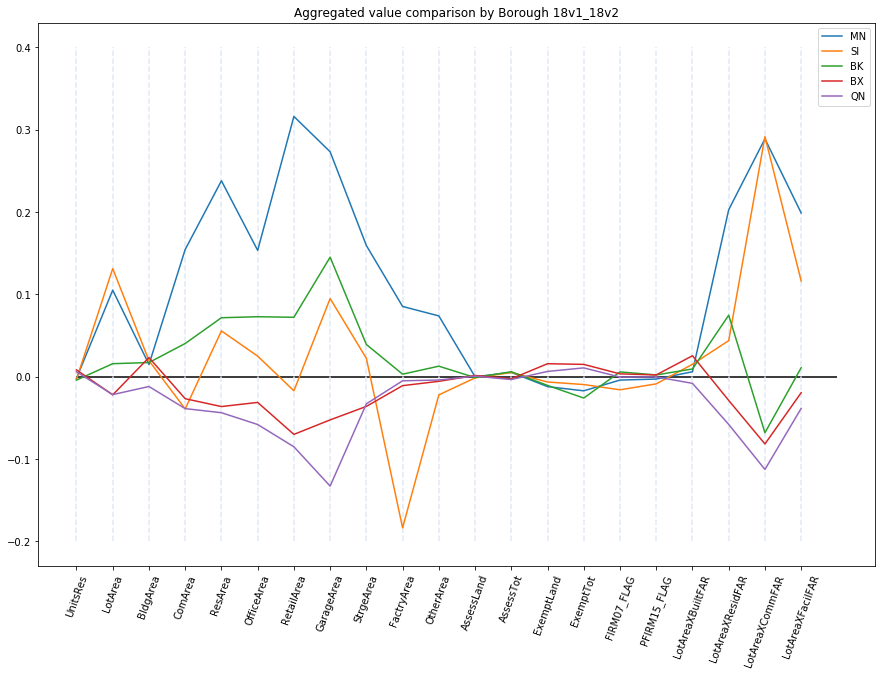

In [80]:
plt.figure(figsize=(15, 10))
plt.plot(range(21), sMN.iloc[1, :], label='MN')
plt.plot(range(21), sSI.iloc[1, :], label='SI')
plt.plot(range(21), sBK.iloc[1, :], label='BK')
plt.plot(range(21), sBX.iloc[1, :], label='BX')
plt.plot(range(21), sQN.iloc[1, :], label='QN')
# plt.plot(range(21), summary_pct.iloc[1, :], label='18v2 vs 18v1')
# plt.plot(range(21), summary_pct.iloc[2, :], label='18v11 vs 18v1')
# plt.plot(range(21), summary_pct.iloc[2, :], label='17v11 vs 18v1')
plt.hlines(0, 0, 21, color = 'black')
for i in range(21):
    plt.vlines(i, -0.2, 0.4, color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(21), summary_pct.columns, rotation=70)
plt.title('Aggregated value comparison by Borough 18v1_18v2')
plt.legend()
plt.show()

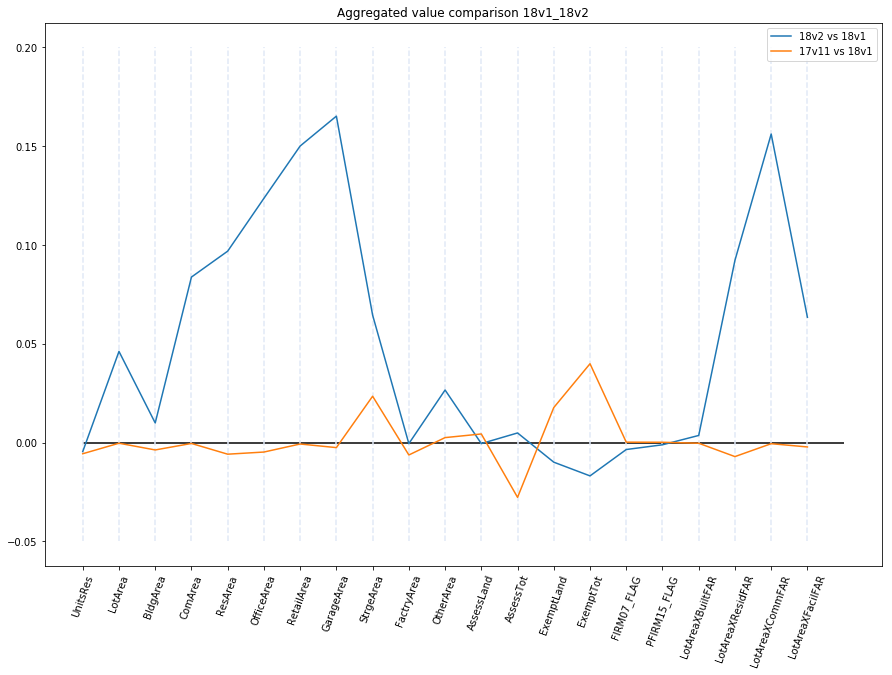

In [86]:
plt.figure(figsize=(15, 10))
plt.plot(range(21), summary_pct.iloc[1, :], label='18v2 vs 18v1')
plt.plot(range(21), summary_pct.iloc[2, :], label='17v11 vs 18v1')
plt.hlines(0, 0, 21, color = 'black')
for i in range(21):
    plt.vlines(i, -0.05, 0.2, color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(21), summary_pct.columns, rotation=70)
plt.title('Aggregated value comparison 18v1_18v2')
plt.legend()
plt.show()